<a href="https://colab.research.google.com/github/snehuman/AWS-AI-ML-/blob/main/Image_classifier_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI Programming with Python Nanodegree: Image Classifier Project
  - Do not make changes to the first 2 code cells, they are being used for setting up the `flowers` dataset and `cat_to_name.json`. Start writing code from third code cell onwards.
  - To use this notebook: `File > Save a copy in Drive`
  

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [ ]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Dataset already setup at ./flowers


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [ ]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [ ]:
# required imports

import torch
from torchvision import datasets, transforms
import helper
from torch import nn, optim
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image
import torch
from torchvision import models
from torch import nn, optim
import torch.nn as nn


In [ ]:
# transformation
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])
# loading the images
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform = test_transforms)

# loading the data
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle = True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=32, shuffle = True)


In [ ]:
# choosing the pretrained model, resnet18
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False   #Freeze feature extraction layers

# defining the model
model.fc = nn.Sequential(nn.Linear(512, 256),
                         nn.ReLU(),
                         nn.Dropout(0.3),
                         nn.Linear(256, 152),
                         nn.ReLU(),
                         nn.Dropout(0.3),
                         nn.Linear(152, 102),
                         nn.LogSoftmax(dim=1))

# for the new model, model.fc
for param in model.fc.parameters():
    param.requires_grad = True

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# defining the criterion, loss and optimizer
criterion = nn.NLLLoss()

optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# making sure that, it is available in both -> cpu and gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device);

In [ ]:
# printing out the shape of the test loader
images, labels = next(iter(testloader))
images = images.to(device)

ps = torch.exp(model(images))
print(ps.shape)


torch.Size([32, 102])


In [ ]:
# training the model
epochs = 5
train_losses, valid_losses = [], []

for e in range(epochs):
  training_loss = 0
  model.train() # model is in training mode

  for images, labels in trainloader:

    images, labels = images.to(device), labels.to(device) # to check cpu or gpu

    optimizer.zero_grad() # function to zero the gradient

    log_ps = model(images)  # for forward pass
    loss = criterion(log_ps, labels)  # computing the training loss
    loss.backward()  #backpropagation
    optimizer.step()  #updating the weights

    training_loss += loss.item()  # summing the training loss

# After training for one epoch, move to evaluation
  else:
    valid_loss = 0
    accuracy = 0
    model.eval()  # model is in evaluation mode

    with torch.no_grad():  # turning off the gradients for validation
      for images, labels in validloader:
        images, labels = images.to(device), labels.to(device)  # checking for gpu or cpu

        log_ps = model.forward(images)  # forward pass
        valid_loss += criterion(log_ps, labels).item()  # summing the validation loss

 # calulate the accuracy
        ps = torch.exp(log_ps)  # calculating the exponential
        top_p, top_class = ps.topk(1, dim=1)  # getting the predicted classes
        equals = top_class == labels.view(*top_class.shape)  # to check if the prediction are correct
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()  # calculating the accuracy, and summing them

        train_losses.append(training_loss / len(trainloader))  # appending the training losses
        valid_losses.append(valid_loss / len(validloader))   # appending the validation losses

# printing the epochs, training loss, validation loss and accuracy
    print(f"Epoch: {e+1}/{epochs}.. "
          f"Training Loss: {training_loss / len(trainloader):.3f}.. "
          f"valid Loss: {valid_loss / len(validloader):.3f}.. "
          f"Accuracy: {accuracy / len(validloader):.3f}")


Epoch: 1/5.. Training Loss: 3.884.. valid Loss: 2.323.. Accuracy: 0.422
Epoch: 2/5.. Training Loss: 2.447.. valid Loss: 1.344.. Accuracy: 0.658
Epoch: 3/5.. Training Loss: 1.976.. valid Loss: 1.021.. Accuracy: 0.729
Epoch: 4/5.. Training Loss: 1.685.. valid Loss: 0.833.. Accuracy: 0.756
Epoch: 5/5.. Training Loss: 1.558.. valid Loss: 0.719.. Accuracy: 0.808


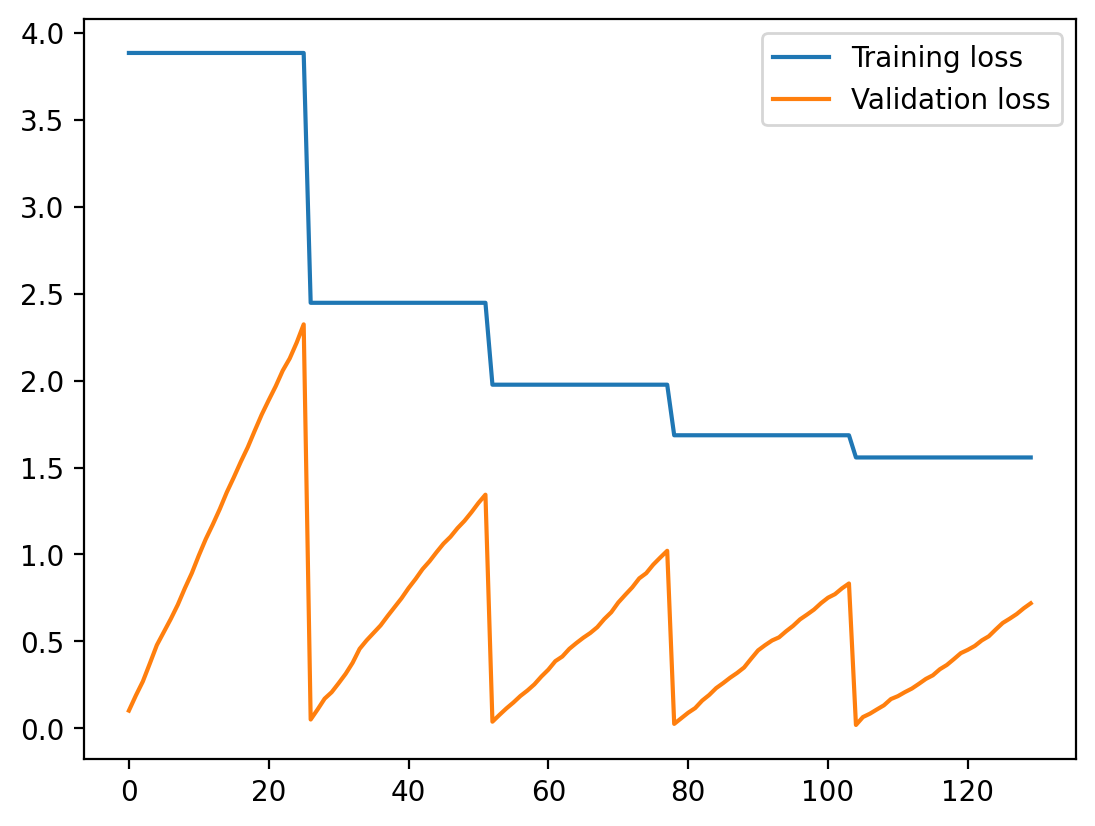

In [ ]:
# plotting the training vs validation loss
%matplotlib inline  #It renders matplotlib plots directly below the code cell that produced it.
%config InlineBackend.figure_format = 'retina'  # enables high-resolution plotting for matplotlib plots

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend();
plt.show()

In [ ]:
# checking the accuracy on test data
model.eval()  # model in evaluation mode
test_accuracy = 0

with torch.no_grad(): # turning off the checking on the testing data
    for images, labels in testloader:
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = model(images)

        ps = torch.exp(outputs)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        test_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

print(f"Test accuracy : {test_accuracy / len(testloader):.3f}")


Test accuracy : 0.772


In [ ]:
# It prints the keys of the model's state dictionary.
# model's state dictionary = It is a dictionary containing a mapping between
# each layer in the model and its corresponding parameters/weights.

print("The state dict keys: \n\n", model.state_dict().keys())

The state dict keys: 

 odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer1.1.bn2.num_batches_tracked', 'layer2.0.conv1.weight', 'layer2.0.bn1.weight', 'layer2.0.bn1.bias', 'layer2.0.bn1.running_mean', 'layer2.0.bn1.running_var', 'layer2.0.bn1.num_batches_tracked', 'layer2.0.conv2.weight', 'layer2.0.bn2.weight'

In [ ]:
# stores the class-to-index mapping from the training data into the model
class_to_index = train_data.class_to_idx
model.class_to_index = class_to_index

In [ ]:

torch.save(model.state_dict(), 'checkpoint.pth')  #saves the model's state dictionary to a file named 'checkpoint.pth'
state_dict = torch.load('checkpoint.pth', map_location = torch.device('cpu'))  #loads the saved state dictionary from the file 'checkpoint.pth'
model.load_state_dict(state_dict) # loads the saved weights

model.class_to_index = train_data.class_to_idx  # stores the class-to-index mapping from the training data into the model

# making a checkpoint
checkpoint = {
        'model': model.fc,
        'state_dict': model.state_dict(),
        'class_to_idx': model.class_to_index,
        'optimizer_state_dict': optimizer.state_dict(),

}

#saving the checkpoint to a file called checkpoint.pth
torch.save(checkpoint, 'checkpoint.pth')

<ipython-input-13-15778f4c64ae>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('checkpoint.pth', map_location = torch.device('cpu'))


In [ ]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)  # load the checkpoint

    model = models.resnet18(pretrained=True)  # recreate the model
    for param in model.parameters():
        param.requires_grad = False

# making the layers again
    model.fc = nn.Sequential(nn.Linear(512, 256),
                                nn.ReLU(),
                                nn.Dropout(0.3),
                                nn.Linear(256, 152),
                                nn.ReLU(),
                                nn.Dropout(0.3),
                                nn.Linear(152, 102),
                                nn.LogSoftmax(dim=1))

# load the saved model state, into the model
    model.load_state_dict(checkpoint['state_dict'])


    optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # optimizer

    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])  # load the optimizer state and resume training

    model.class_to_index = checkpoint['class_to_idx'] # Load the class_to_idx mapping

    model.to(device) # cpu or gpu

    return model, optimizer

model, optimizer = load_checkpoint('checkpoint.pth')


<ipython-input-14-0849aaa781b4>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath)


In [ ]:

def process_image(image_path):
    img = Image.open(image_path) # opens the image specified by image_path using the Pillow library & create an Image object

    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = preprocess(img)  # applies the preprocessing transformations to the image

    return img


In [ ]:
def predict(image_path, model, topk=5):

    img = process_image(image_path)  # preprocessing the image

    img = img.unsqueeze(0)  # adds a batch dimension to the image tensor.

    img = img.to(device)   # cpu or gpu
    model = model.to(device)

    model.eval()  # model in evaluation mode
    with torch.no_grad():  # turning the gradient calculation, for inference
        log_ps = model(img)  # passes the img(input) through the model to get the log proabability
        ps = torch.exp(log_ps)

        top_p, top_class = ps.topk(topk, dim=1)  # getting the top predicted classes

# creates a dictionary to map index values to class labels, reversing the existing class_to_index mapping in the model
    idx_to_class = {v: k for k, v in model.class_to_index.items()}

# It retrieves the names of the top predicted classes using the idx_to_class mapping.
    top_class_names = [idx_to_class[i.item()] for i in top_class[0]]

    return top_p[0].cpu().numpy(), top_class_names


In [ ]:

def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()  #  sets up the plotting area for displaying the image

    if isinstance(image, torch.Tensor):  # If image is a PyTorch tensor, it converts it to a NumPy array for
        image = image.numpy()            # plotting using Matplotlib, which expects NumPy arrays

# It transposes the image dimensions from (channels, height, width) to (height, width, channels).
    image = image.transpose((1, 2, 0))

# It reverses the normalization applied to the image during preprocessing, bringing it back to the original color space for display.
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean


    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax


In [ ]:

def check(image_path, model, topk=5):

    with open('cat_to_name.json', 'r') as f:
        cat_to_name = json.load(f)   # load the cat to name file in reading mode, and store it into in cat_to_name

    probs, classes = predict(image_path, model, topk=topk)

    flower_names = [cat_to_name[str(cls)] for cls in classes]

    img = process_image(image_path)

    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), nrows=2)

    imshow(img, ax=ax1)
    ax1.set_title(flower_names[0])

    y_pos = np.arange(len(flower_names))
    ax2.barh(y_pos, probs)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(flower_names)
    ax2.invert_yaxis()

    plt.show()


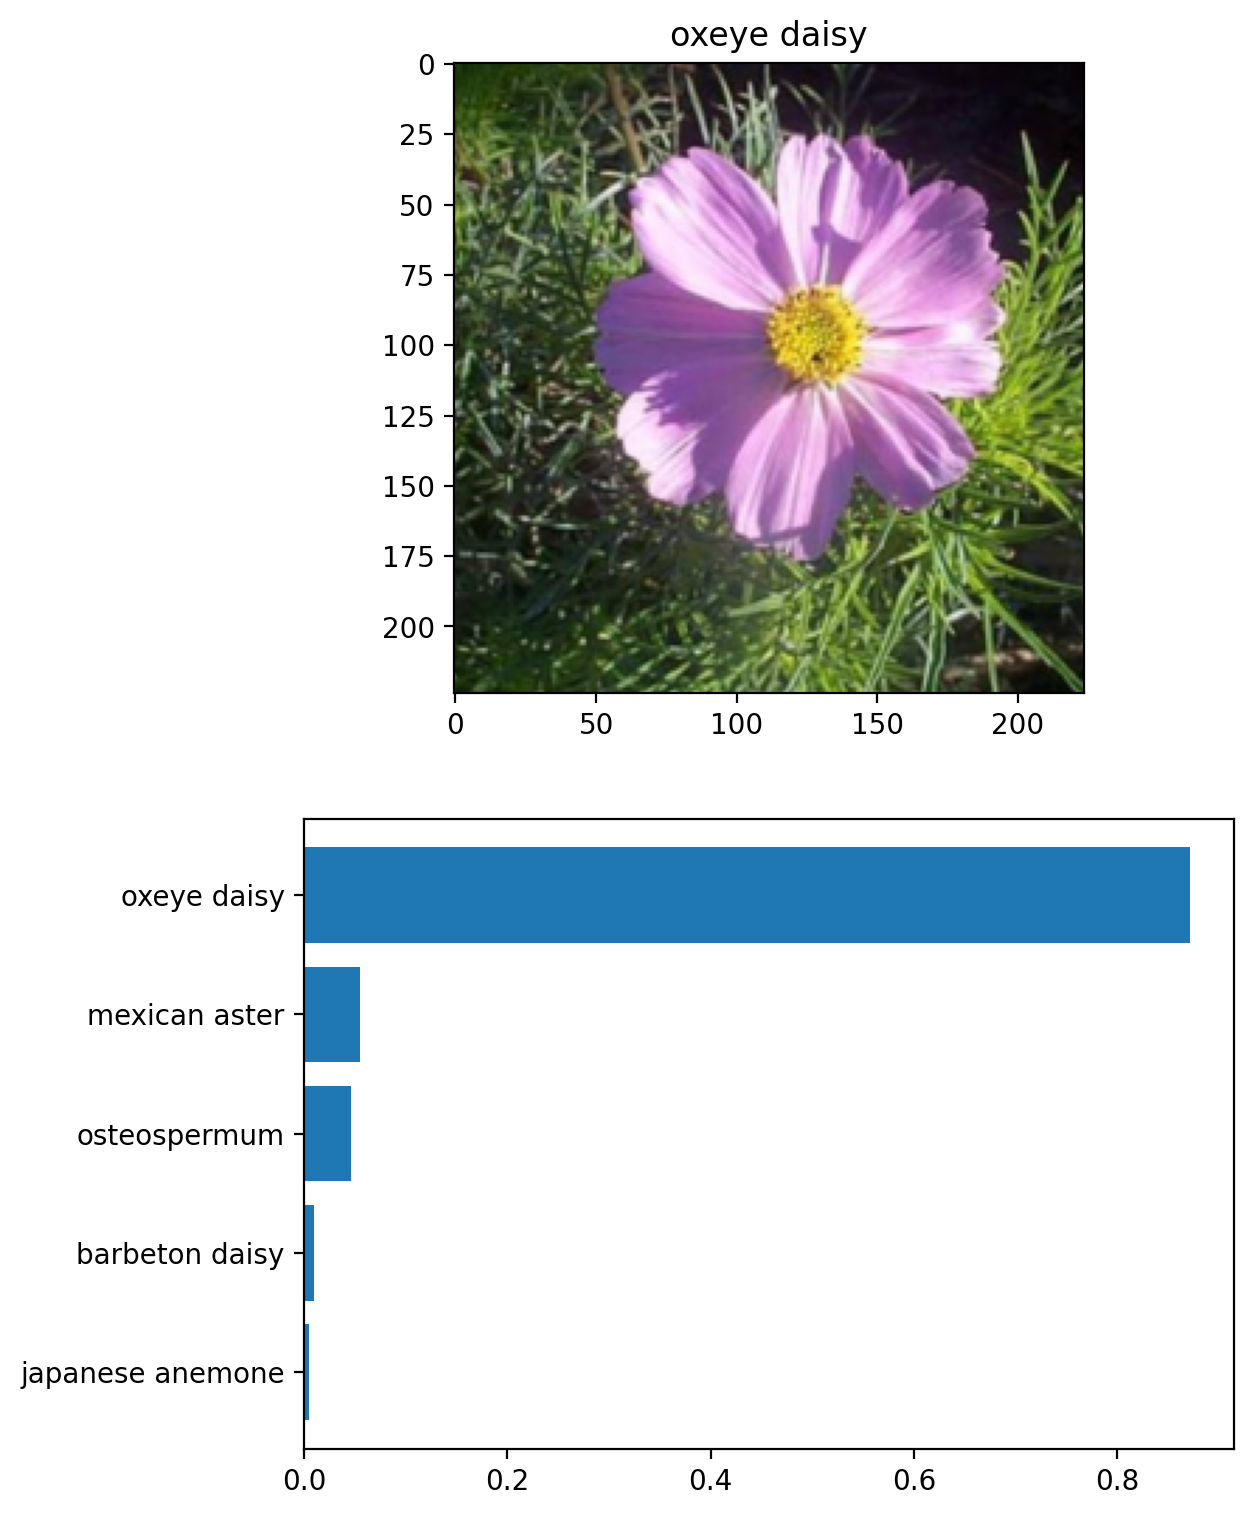

In [ ]:
image_path = '/content/flowers/test/34/image_06929.jpg'
check(image_path, model, topk=5)


In [ ]:
%%writefile train.py
import torch
from torchvision import datasets, transforms
import helper
from torch import nn, optim
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image
import torch
from torchvision import models
from torch import nn, optim
import torch.nn as nn
import argparse
import json

parser = argparse.ArgumentParser(description = " Training the neural network")

parser.add_argument('data_dir', type = str, help = "training")
parser.add_argument('--save_dir', type = str, help = "save the checkpoint" ,action="store", dest="save_dir" )
parser.add_argument('--learning_rate', type = float, help = "learning rate", action="store", dest="learning_rate", default=0.001)
parser.add_argument('--hidden_layer', type = int, help = "number of hidden layer", action = 'store')
parser.add_argument('--epochs', type = int, help = "number of epochs", default = 5)
parser.add_argument('--gpu', help = 'usage of gpu', action = 'store_true' )
parser.add_argument('--arch', type=str, default = 'resnet18', help="Choose the model architecture", action="store")

args = parser.parse_args()

data_dir = args.data_dir
save_dir = args.save_dir
learning_rate = args.learning_rate
hidden_layer = args.hidden_layer
epochs = args.epochs
gpu = args.gpu
arch = args.arch

train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform = test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle = True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=32, shuffle = True)



# for choosing resnet 18 , this is deafault

if arch == 'resnet50':
  model = models.resnet50(pretrained=True)
  for param in model.parameters():
      param.requires_grad = False

else:
  model = models.resnet18(pretrained=True)
  for param in model.parameters():
      param.requires_grad = False


model.fc = nn.Sequential(nn.Linear(512, 256),
                          nn.ReLU(),
                          nn.Dropout(0.3),
                          nn.Linear(256, 152),
                          nn.ReLU(),
                          nn.Dropout(0.3),
                          nn.Linear(152, 102),
                          nn.LogSoftmax(dim=1))

for param in model.fc.parameters():
  param.requires_grad = True


criterion = nn.NLLLoss()

optimizer = optim.Adam(model.fc.parameters(), lr = 0.001)

device = torch.device("cuda" if args.gpu and torch.cuda.is_available() else "cpu")
model.to(device)


epochs = 5
train_losses, valid_losses = [], []

for e in range(epochs):
  training_loss = 0
  model.train()

  for images, labels in trainloader:

    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()

    log_ps = model(images)
    loss = criterion(log_ps, labels)
    loss.backward()
    optimizer.step()

    training_loss += loss.item()

  else:
    valid_loss = 0
    accuracy = 0
    model.eval()

    with torch.no_grad():
      for images, labels in validloader:
        images, labels = images.to(device), labels.to(device)

        log_ps = model.forward(images)
        valid_loss += criterion(log_ps, labels).item()

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        train_losses.append(training_loss / len(trainloader))
        valid_losses.append(valid_loss / len(validloader))

    print(f"Epoch: {e+1}/{epochs}.. "
          f"Training Loss: {training_loss / len(trainloader):.3f}.. "
          f"valid Loss: {valid_loss / len(validloader):.3f}.. "
          f"Accuracy: {accuracy / len(validloader):.3f}")




def saveCheckpoint(model, save_path):
  torch.save(model.state_dict(), 'checkpoint.pth')
  model.load_state_dict(torch.load('checkpoint.pth', map_location = torch.device('cpu')))

  model.class_to_index = train_data.class_to_idx

  checkpoint = {
          'model': model.fc,
          'state_dict': model.state_dict(),
          'class_to_idx': model.class_to_index,
          'optimizer_state_dict': optimizer.state_dict(),
          }

if args.save_dir:
  saveCheckpoint(model, save_dir + '/checkpoint.pth')
else:
  saveCheckpoint(model, 'checkpoint.pth')


Overwriting train.py


In [ ]:
!python train.py /content/flowers --save_dir /content/checkpoint.pth

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
^C


In [ ]:
%%writefile predict.py
import torch
from torchvision import datasets, transforms
import helper
from torch import nn, optim
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image
import torch
from torchvision import models
from torch import nn, optim
import torch.nn as nn
import argparse
import json

parser = argparse.ArgumentParser(description = " predict the flower name ")

parser.add_argument('data_dir', type = str, help = "training")
parser.add_argument('--top_k', type=int, default=5, help="Return top K predictions", dest="top_k")
parser.add_argument('--save_dir', type = str, help = "save the checkpoint" , dest="save_dir" )
parser.add_argument('--category_names', type=str, dest = 'category_names', default='cat_to_name.json' )
parser.add_argument('--gpu', help = 'usage of gpu', action = 'store_true' )
parser.add_argument('--learning_rate', type = float, help = "learning rate", action="store", dest="learning_rate", default=0.001)
parser.add_argument('--hidden_layer', type = int, help = "number of hidden layer", action = 'store')
parser.add_argument('--epochs', type = int, help = "number of epochs", default = 5)
parser.add_argument('--arch', type=str, default = 'resnet18', help="Choose the model architecture", action="store")



args = parser.parse_args()

data_dir = args.data_dir
top_k = args.top_k
save_dir = args.save_dir
category_names = args.category_names
gpu = args.gpu
learning_rate = args.learning_rate
hidden_layer = args.hidden_layer
epochs = args.epochs
arch = args.arch

train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform = test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle = True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=32, shuffle = True)



# for choosing resnet 18 , this is deafault

if arch == 'resnet50':
  model = models.resnet50(pretrained=True)
  for param in model.parameters():
      param.requires_grad = False

else:
  model = models.resnet18(pretrained=True)
  for param in model.parameters():
      param.requires_grad = False


model.fc = nn.Sequential(nn.Linear(512, 256),
                          nn.ReLU(),
                          nn.Dropout(0.3),
                          nn.Linear(256, 152),
                          nn.ReLU(),
                          nn.Dropout(0.3),
                          nn.Linear(152, 102),
                          nn.LogSoftmax(dim=1))

for param in model.fc.parameters():
  param.requires_grad = True


criterion = nn.NLLLoss()

optimizer = optim.Adam(model.fc.parameters(), lr = 0.001)

device = torch.device("cuda" if args.gpu and torch.cuda.is_available() else "cpu")
model.to(device)


epochs = 5
train_losses, valid_losses = [], []

for e in range(epochs):
  training_loss = 0
  model.train()

  for images, labels in trainloader:

    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()

    log_ps = model(images)
    loss = criterion(log_ps, labels)
    loss.backward()
    optimizer.step()

    training_loss += loss.item()

  else:
    valid_loss = 0
    accuracy = 0
    model.eval()

    with torch.no_grad():
      for images, labels in validloader:
        images, labels = images.to(device), labels.to(device)

        log_ps = model.forward(images)
        valid_loss += criterion(log_ps, labels).item()

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        train_losses.append(training_loss / len(trainloader))
        valid_losses.append(valid_loss / len(validloader))



model.state_dict().keys()

class_to_index = train_data.class_to_idx
model.class_to_index = class_to_index

torch.save(model.state_dict(), 'checkpoint.pth')
state_dict = torch.load('checkpoint.pth', map_location = torch.device('cpu'))
model.load_state_dict(state_dict)

model.class_to_index = train_data.class_to_idx

checkpoint = {
        'model': model.fc,
        'state_dict': model.state_dict(),
        'class_to_idx': model.class_to_index,
        'optimizer_state_dict': optimizer.state_dict(),

}

torch.save(checkpoint, 'checkpoint.pth')


def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)

    model = models.resnet18(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False

    model.fc = nn.Sequential(nn.Linear(512, 256),
                                nn.ReLU(),
                                nn.Dropout(0.3),
                                nn.Linear(256, 152),
                                nn.ReLU(),
                                nn.Dropout(0.3),
                                nn.Linear(152, 102),
                                nn.LogSoftmax(dim=1))

    model.load_state_dict(checkpoint['state_dict'])

    optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    model.class_to_index = checkpoint['class_to_idx']
    model.to(device)
    return model, optimizer

model, optimizer = load_checkpoint('checkpoint.pth')

def process_image(image_path):
    img = Image.open(image_path)

    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = preprocess(img)

    return img


def predict(image_path, model, topk=5):

    img = process_image(image_path)

    img = img.unsqueeze(0)

    img = img.to(device)
    model = model.to(device)

    model.eval()
    with torch.no_grad():
        log_ps = model(img)
        ps = torch.exp(log_ps)

        top_p, top_class = ps.topk(topk, dim=1)

    idx_to_class = {v: k for k, v in model.class_to_index.items()}
    top_class_names = [idx_to_class[i.item()] for i in top_class[0]]

    return top_p[0].cpu().numpy(), top_class_names


def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()

    if isinstance(image, torch.Tensor):
        image = image.numpy()

    image = image.transpose((1, 2, 0))

    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax

def check(image_path, model, topk=5):

    with open('cat_to_name.json', 'r') as f:
        cat_to_name = json.load(f)

    probs, classes = predict(image_path, model, topk=topk)

    flower_names = [cat_to_name[str(cls)] for cls in classes]

    img = process_image(image_path)

    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), nrows=2)

    imshow(img, ax=ax1)
    ax1.set_title(flower_names[0])

    y_pos = np.arange(len(flower_names))
    ax2.barh(y_pos, probs)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(flower_names)
    ax2.invert_yaxis()

    plt.show()

image_path = '/content/flowers/test/34/image_06929.jpg'
check(image_path, model, topk=5)



Overwriting predict.py


In [ ]:
!python predict.py /content/flowers --save_dir /content/checkpoint.pth

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
